<img src="https://media.giphy.com/media/l1KtVQLora1PulL8Y/giphy.gif" width="240" height="360" />


# MMT Task

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Importing Packages](#section201)<br>
    - 2.2 [Importing the Dataset](#section202)<br>
    - 2.3 [Attributes of Data](#section203)<br>
    - 2.4 [Column-wise Analysis](#section204)<br>
3. [Problem Statement 1](#section3)
4. [Problem Statement 2](#section4)
5. [Problem Statement 3](#section5)
6. [Problem Statement 4](#section6)<br>


<a id=section1></a>

## 1. Problem Statement

- Provide insights about type of customers present with us and their implications on overall data set using Clustering.

- Who are our top 1 percentile of user. Why are they in this bucket.

- Build a statistical Model to find the probability of repeat transaction by a user and divide them in 10 different buckets of probability with equal user in each bucket.

- What is the probability of users transacting again, who have made single transaction till date?

<a id=section2></a>

## 2. Data Loading and Description

<a id=section201></a>

### 2.1 Importing packages  

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis

import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


from subprocess import check_output

<a id=section202></a>

### 2.2 Importing the Dataset

In [2]:
mmt_data = pd.read_excel('D:\\DATA_SCIENCE\\MMT_Task\\Data_Set1.xlsx')

In [94]:
mmt_data.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN


In [15]:
mmt_data.shape

(100000, 11)

- Dataset has **100000 observations**. Below is a table showing names of columns and their description.

|Column   		|Description                                                    |
|-------    	|:---------                                                    :|
|userid     	|Unique id to identify a user                                   |
|signup_date	|Date when the user first signed in with us                     |
|wallet	    	|Amount present in his wallet                                   |
|tier	    	|Current loyality standing                                      |
|txns	    	|total number of transactions                                   |
|sync_tag		|to identify if a customer has synces his contact book or not   |
|operator_name	|Which mobile operator he is using                              |
|state		    |Which state does one's mobile number belongs to                |
|app_status	    |Whether at present customer has mobile app or not              | 
|segment	    |Which type of mobile handset bucket customer lies in           |
|task	        |How many times customer has earned loyality money.             |

<a id=section203></a>

### 2.3 Attributes of Data

In [16]:
mmt_data.dtypes

userid                   object
signup_date      datetime64[ns]
wallet                  float64
tier                     object
txns                      int64
sync_tag                 object
operator_name            object
state                    object
app_status               object
segment                  object
task                    float64
dtype: object

In [17]:
mmt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
userid           100000 non-null object
signup_date      100000 non-null datetime64[ns]
wallet           96950 non-null float64
tier             100000 non-null object
txns             100000 non-null int64
sync_tag         100000 non-null object
operator_name    44447 non-null object
state            44447 non-null object
app_status       100000 non-null object
segment          27481 non-null object
task             10323 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.4+ MB


#### Null Values

In [5]:
mmt_data.isnull().sum()/100000*100

userid            0.000
signup_date       0.000
wallet            3.050
tier              0.000
txns              0.000
sync_tag          0.000
operator_name    55.553
state            55.553
app_status        0.000
segment          72.519
task             89.677
dtype: float64

- 3% null values in wallet
- 55.55% null values in operator name 
- 55.55% null values in state
- 72% null values in segment
- 89% null values in task

<a id=section204></a>

### 2.4 Column-wise Analysis

##### User id

In [6]:
mmt_data['userid'].isnull().sum()

0

- No null values.

In [7]:
len(mmt_data['userid'].unique())

100000

- There are no duplicates in 'userid'.

##### sign up date

In [8]:
mmt_data['signup_date'].isnull().sum()

0

- No null values.

In [9]:
len(mmt_data['signup_date'].unique())

1362

- Check for unique values in year.
- Check for unique values in month.

In [10]:
#Exr=tracting year from the dates
year = mmt_data.signup_date.dt.year
year.head()


0    2010
1    2010
2    2010
3    2011
4    2011
Name: signup_date, dtype: int64

In [11]:
year.unique()

array([2010, 2011, 2012, 2009, 2013], dtype=int64)

- We have values of the following months.

In [12]:
#Extracting months from dates
month = mmt_data.signup_date.dt.month
month.head()

0    10
1    11
2    12
3     5
4     7
Name: signup_date, dtype: int64

In [13]:
month.unique()

array([10, 11, 12,  5,  7,  9,  1,  2,  3,  6,  4,  8], dtype=int64)

In [14]:
mmt_data1 = mmt_data.copy() #creating to copy to make changes in the copy.

In [15]:
mmt_data1['year'] = year

In [16]:
mmt_data1.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task,year
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN,2010
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN,2010
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0,2010
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN,2011
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN,2011


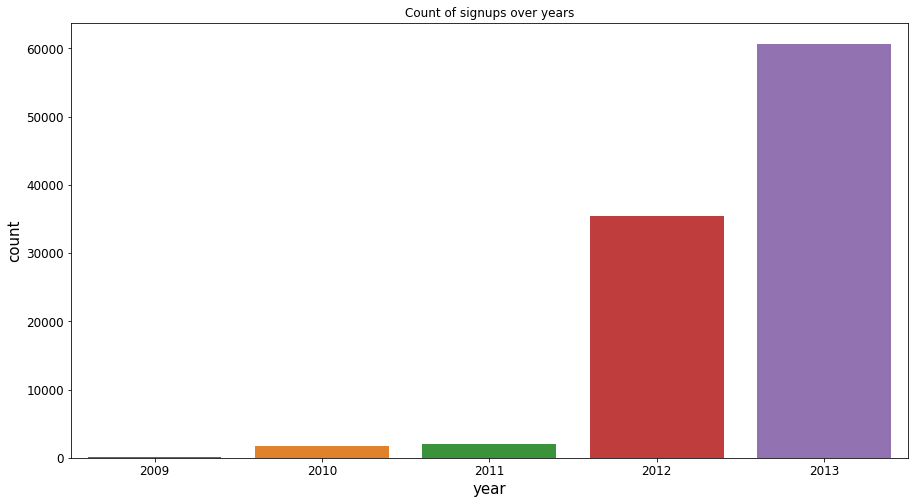

In [62]:
#Plotting count of signups over the years
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='year', data=mmt_data1).set_title('Count of signups over years')
plt.savefig('Count plot for year.png', bbox_inches='tight')

- There has been tremendous increase in signups over the years.

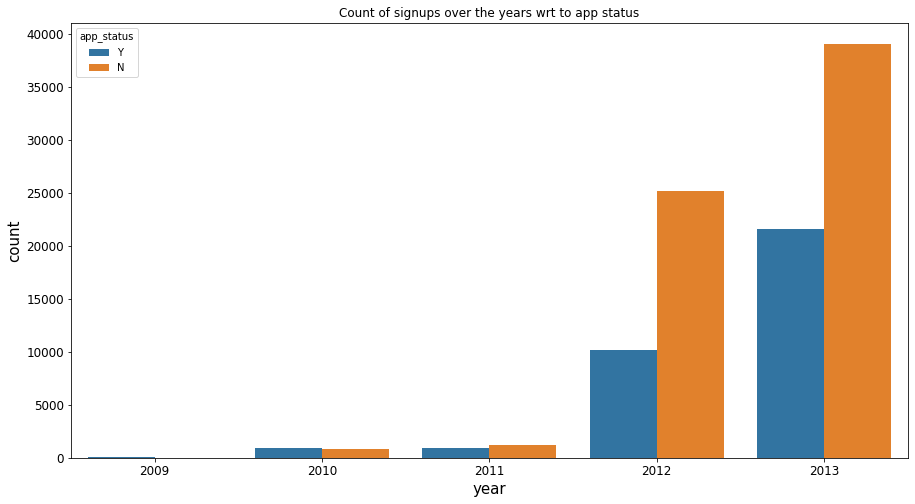

In [63]:
#Plotting count of signups over the years wrt to app status
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='year', data=mmt_data1, hue = 'app_status').set_title('Count of signups over the years wrt to app status')
plt.savefig('Count plot for year wrt to app status.png', bbox_inches='tight')

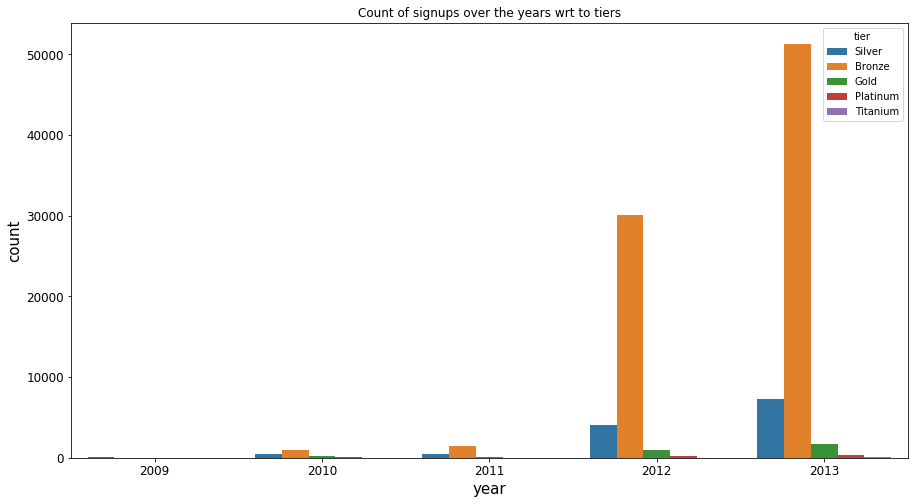

In [18]:
#Plotting count of signups over the years wrt to app status
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='year', data=mmt_data1, hue = 'tier').set_title('Count of signups over the years wrt to tiers')
plt.savefig('Count plot for year wrt to app tiers.png', bbox_inches='tight')

In [35]:
#Adding months column to dataframe
mmt_data1['month'] = month
mmt_data1.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task,year,month
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN,2010,10
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN,2010,11
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0,2010,12
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN,2011,5
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN,2011,7


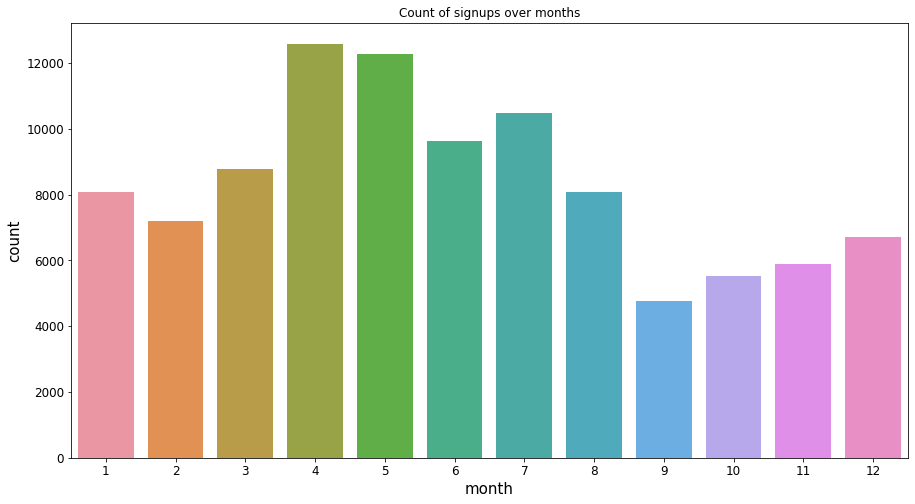

In [65]:
#Plotting count of signups over the months
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Month', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='month', data=mmt_data1).set_title('Count of signups over months')
plt.savefig('Count plot for months.png', bbox_inches='tight')

- Neglecting the year of signup, maximum signups has been in the month of 'April'

### Wallet

In [10]:
mmt_data['wallet'].isnull().sum()/100000*100

3.05

- 3.05% missing values.

In [11]:
mmt_data[mmt_data['wallet'] > 0].count()

userid           6763
signup_date      6763
wallet           6763
tier             6763
txns             6763
sync_tag         6763
operator_name    6466
state            6466
app_status       6763
segment          6302
task             4720
dtype: int64

- Out of 1 lakh users only 6763 users have some amount in wallet, that is, 6.76%.

In [12]:
mmt_data['wallet'].max()

2390.0

- Maximum amount in wallet.

In [13]:
mmt_data['wallet'].min()

0.0

In [14]:
mmt_data['wallet'].mode()

0    0.0
dtype: float64

In [15]:
mmt_data['wallet'].median()

0.0

So, replacing null values with mode value.

In [3]:
#Replacing null values with mode value
mmt_data['wallet']= mmt_data['wallet'].fillna(0.0)

In [4]:
mmt_data['wallet'].isnull().sum()

0

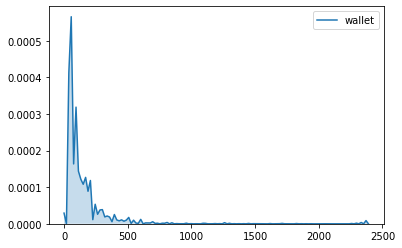

<Figure size 1080x720 with 0 Axes>

In [101]:
#To check distribution of wallet amounts
sns.kdeplot(mmt_data['wallet'], shade = True)
plt.figure(figsize = (15,10))
plt.savefig('Distribution of wallet amount.png', bbox_inches='tight')

- Left skewed data with maximum having 0 balance in wallet.
- Not many users use MMT Wallet

### tier

In [20]:
mmt_data['tier'].isnull().sum()

0

- No null values.

In [21]:
mmt_data['tier'].unique()  #Findimg unique values in this column

array(['Silver', 'Bronze', 'Gold', 'Platinum', 'Titanium'], dtype=object)

In [9]:
mmt_data['tier'].value_counts()

Bronze      83870
Silver      12337
Gold         3027
Platinum      685
Titanium       81
Name: tier, dtype: int64

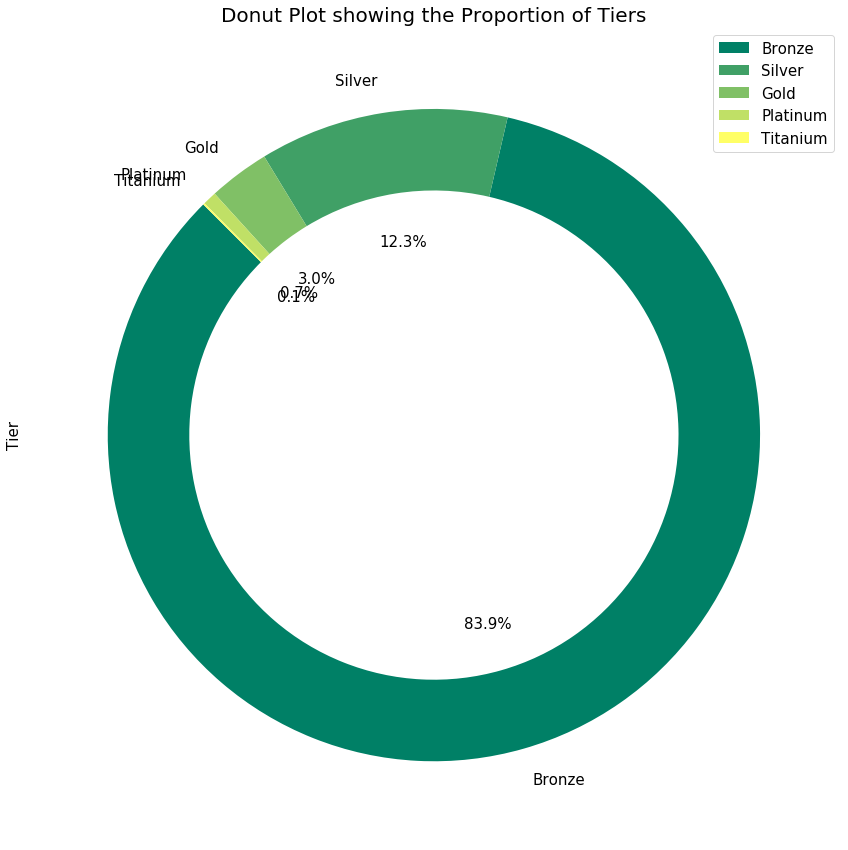

In [74]:
plt.figure(figsize=(15,15))
mmt_data['tier'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=15, autopct='%3.1f%%', figsize=(15,15), 
                                       startangle=135,  cmap='summer')

plt.ylabel('Tier', fontsize = 15)
plt.title('Donut Plot showing the Proportion of Tiers', fontsize = 20)
plt.legend(fontsize =15)
plt.savefig('Donut Plot showing the proportion of Tiers.png')


Text(0, 0.5, 'Number of Users')

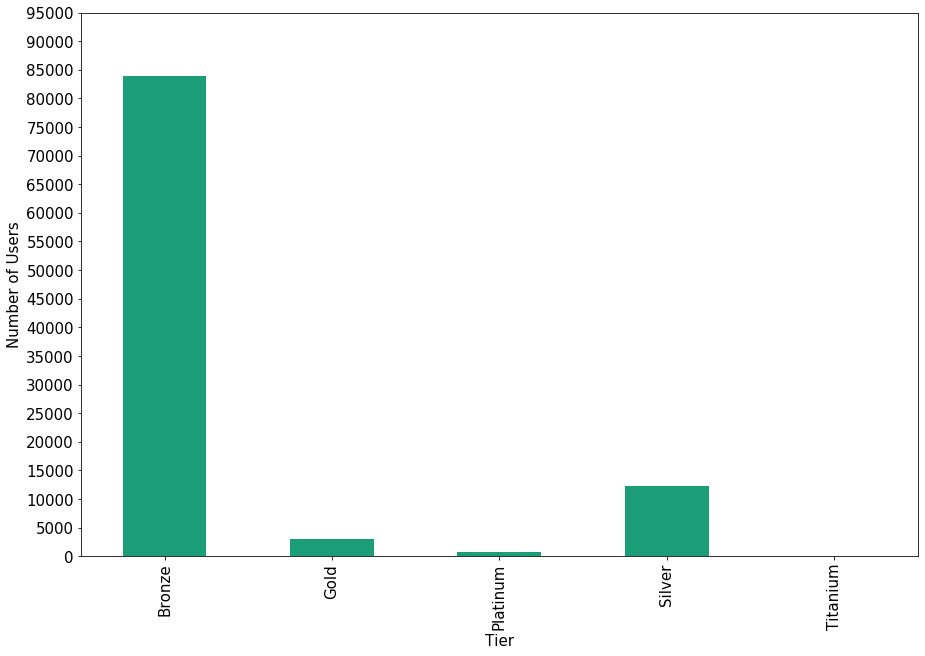

In [31]:
mmt_data['tier'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,10), colormap = 'Dark2', fontsize = 15)
plt.yticks(np.arange(0,100000,5000))
plt.xlabel('Tier', fontsize = 15)
plt.ylabel('Number of Users', fontsize = 15)
#plt.title('Year Distribution of Top 10 Movies', fontsize = 20)
#plt.savefig('Year Distribution of Top 10 Movies.png')

### txns - total number of transactions

In [38]:
mmt_data['txns'].isnull().sum()

0

- No null values

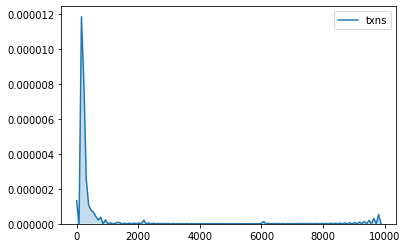

<Figure size 1080x720 with 0 Axes>

In [75]:
#To check distribution of wallet amounts
sns.kdeplot(mmt_data['txns'], shade = True)
plt.figure( figsize = (15,10))
plt.savefig('Distribution of Number of Transaction.png')

In [43]:
mmt_data['txns'].max()

9882

In [44]:
mmt_data['txns'].min()

1

In [42]:
mmt_data[mmt_data['txns'] ==0].count()

userid           0
signup_date      0
wallet           0
tier             0
txns             0
sync_tag         0
operator_name    0
state            0
app_status       0
segment          0
task             0
dtype: int64

In [40]:
mmt_data[mmt_data['txns'] ==1].count()

userid           33495
signup_date      33495
wallet           32193
tier             33495
txns             33495
sync_tag         33495
operator_name     7444
state             7444
app_status       33495
segment           3179
task               867
dtype: int64

- Out of 100000 users, 33495 (33.4%) transacted only once.

In [45]:
mmt_data[mmt_data['txns'] == 2].count()

userid           15325
signup_date      15325
wallet           14785
tier             15325
txns             15325
sync_tag         15325
operator_name     5078
state             5078
app_status       15325
segment           2387
task               645
dtype: int64

In [56]:
mmt_data[mmt_data['txns'] > 1].count()

userid           66505
signup_date      66505
wallet           64757
tier             66505
txns             66505
sync_tag         66505
operator_name    37003
state            37003
app_status       66505
segment          24302
task              9456
dtype: int64

### sync_tag

In [53]:
mmt_data['sync_tag'].isnull().sum()

0

- No null values

In [54]:
mmt_data['sync_tag'].unique()

array(['yes', 'No'], dtype=object)

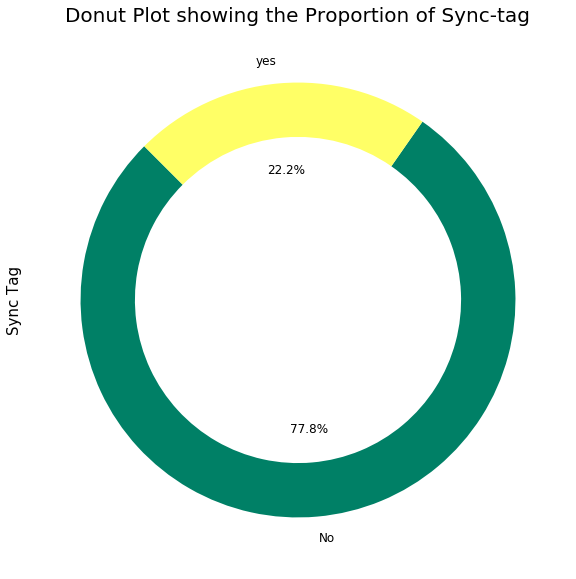

In [76]:
plt.figure(figsize=(15,15))
mmt_data['sync_tag'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=12, autopct='%3.1f%%', figsize=(10,10), 
                                       startangle=135,  cmap='summer')

plt.ylabel('Sync Tag', fontsize = 15)
plt.title('Donut Plot showing the Proportion of Sync-tag', fontsize = 20)
plt.savefig('Donut Plot showing the Proportion of Sync-tag.png')

- Majority of people do not tag their contacts.

### operator_name

In [82]:
mmt_data['operator_name'].isnull().sum()/100000*100

55.553

- 55.55% null values.

In [58]:
mmt_data['operator_name'].unique()

array(['Aircel', 'Vodafone', 'Airtel', nan, 'Jio', 'Reliance Mobile',
       'Idea', 'Tata DoCoMo', 'BSNL', 'Uninor', 'Loop Mobile', 'DOLPHIN',
       'MTS', 'Virgin', 'Videocon', 'S Tel Ltd', 'Telenor', '-',
       'Etisalat', 'Subrin Rintel', 'Spice'], dtype=object)

In [77]:
mmt_data['operator_name'].value_counts()

Airtel             15630
Vodafone           13079
Idea                3689
BSNL                3488
Tata DoCoMo         2915
Reliance Mobile     2854
Aircel              1253
Jio                  622
DOLPHIN              261
Loop Mobile          216
Telenor              119
Videocon              93
Uninor                84
MTS                   78
Virgin                21
Etisalat              18
-                     10
S Tel Ltd              8
Subrin Rintel          7
Spice                  2
Name: operator_name, dtype: int64

- Since it has 55.55% null values, we will drop this column while predicting.

In [6]:
mmt_data['operator_name'].mode()

0    Airtel
dtype: object

### state

In [80]:
mmt_data['state'].isnull().sum()/100000*100

55.553

- 55.55% null values.

In [63]:
mmt_data['state'].unique()

array(['Assam', 'Andhra Pradesh', nan, 'Tamil Nadu', 'Mumbai', 'Delhi',
       'Maharashtra & Goa', 'Karnataka', 'Gujarat', 'Kerala',
       'Madhya Pradesh', 'Orissa', 'Bihar', 'Haryana', 'Kolkata',
       'Chennai', 'UP (East)', 'UP (West)', 'Rajasthan',
       'Jammu and Kashmir', 'West Bengal', 'Punjab', 'North East',
       'Himachal Pradesh', '-'], dtype=object)

In [44]:
mmt_data['state'].value_counts()

Karnataka            8542
Delhi                6090
Mumbai               4845
Andhra Pradesh       4526
Maharashtra & Goa    4206
Gujarat              2446
Tamil Nadu           2334
Chennai              1481
Kolkata              1220
Madhya Pradesh       1178
Rajasthan            1065
Punjab                936
UP (East)             861
Kerala                742
Bihar                 724
UP (West)             620
Orissa                587
Assam                 468
West Bengal           435
Haryana               353
Jammu and Kashmir     343
North East            333
Himachal Pradesh      109
-                       3
Name: state, dtype: int64

- Since it has 55.55% null values, we will drop this column while predicting.

### app status

In [64]:
mmt_data['app_status'].isnull().sum()

0

In [65]:
mmt_data['app_status'].unique()

array(['Y', 'N'], dtype=object)

In [75]:
mmt_data[mmt_data['app_status']=='N'].count()

userid           66341
signup_date      66341
wallet           64711
tier             66341
txns             66341
sync_tag         66341
operator_name    20369
state            20369
app_status       66341
segment           6947
task              1683
dtype: int64

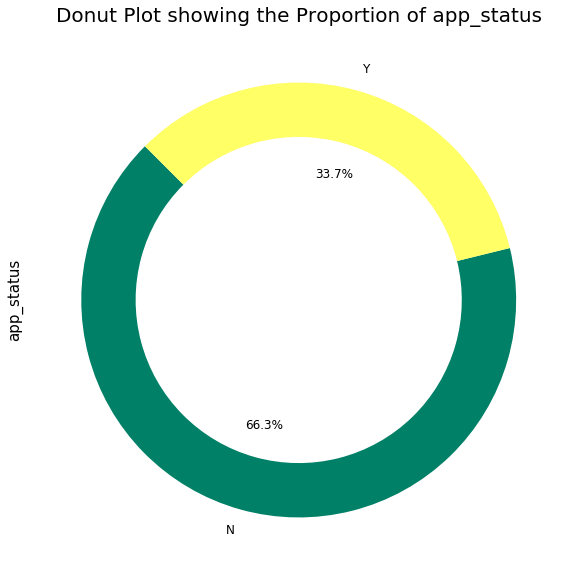

In [34]:
plt.figure(figsize=(15,15))
mmt_data['app_status'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=12, autopct='%3.1f%%', figsize=(10,10), 
                                       startangle=135,  cmap='summer')

plt.ylabel('app_status', fontsize = 15)
plt.title('Donut Plot showing the Proportion of app_status', fontsize = 20)
plt.savefig('Count of app_status.png', bbox_inches='tight')

- App based discounts are required.

### segment

In [45]:
mmt_data['segment'].isnull().sum()/100000*100

72.519

- 72.15% values are missing. So, we will drop this column while buiding a model.

In [71]:
mmt_data['segment'].unique()

array(['ios_mid', nan, 'android_mid', 'android_low', 'android_high',
       'ios_high', 'ios_low'], dtype=object)

### task - How many times customer has earned loyality money.


In [48]:
mmt_data['task'].isnull().sum()/100000*100

89.67699999999999

- 89.67% values are missing. So, we will drop this column while buiding a model.

In [82]:
mmt_data['task'].describe()

count    10323.000000
mean         8.185508
std         12.833415
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        113.000000
Name: task, dtype: float64

In [85]:
mmt_data['task'].mode()

0    1.0
dtype: float64

In [60]:
mmt_data[mmt_data['task'] == 113]

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,task
12850,94c3a9bda93025f1e51b053785e9f75c0bee979e,2010-08-23,340.0,Titanium,10,yes,Airtel,UP (West),Y,113.0


In [83]:
mmt_data[mmt_data['task'] == 0].count()

userid           1577
signup_date      1577
wallet           1573
tier             1577
txns             1577
sync_tag         1577
operator_name    1496
state            1496
app_status       1577
task             1577
dtype: int64

In [7]:
mmt_data['task'].mode()

0    1.0
dtype: float64

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 1080x720 with 0 Axes>

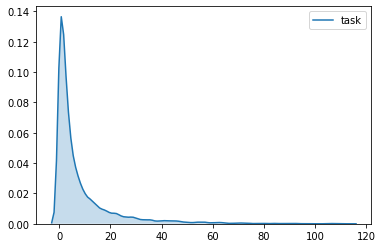

<Figure size 1080x720 with 0 Axes>

In [61]:
sns.kdeplot(mmt_data['task'], shade = True)
plt.figure( figsize = (15,10))

In [8]:
mmt_data.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN


In [9]:
mmt_data.isnull().sum()

userid               0
signup_date          0
wallet               0
tier                 0
txns                 0
sync_tag             0
operator_name    55553
state            55553
app_status           0
segment          72519
task             89677
dtype: int64

<a id=section3></a>

## Problem Statement 1

## Insights about type of customers present with us and their implications on overall data set using Clustering.

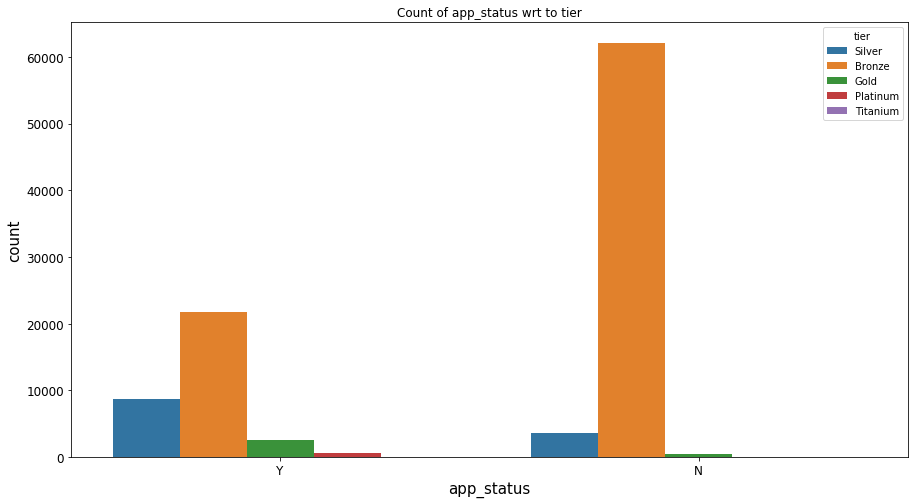

In [20]:
#Plotting count of signups over the years wrt to app status
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='app_status', data=mmt_data, hue = 'tier').set_title('Count of app_status wrt to tier')
plt.savefig('Count of app_status wrt to tier.png', bbox_inches='tight')

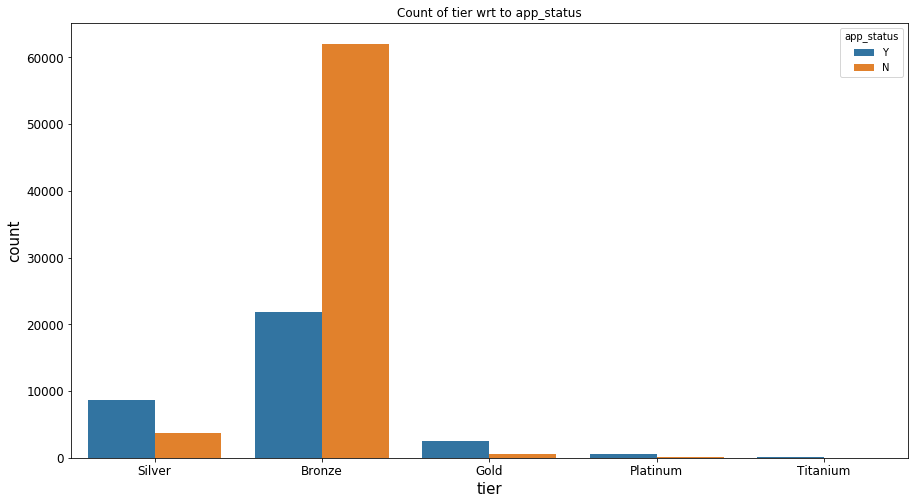

In [22]:
#Plotting count of tiers wrt to app status
plt.figure(figsize=(15,8))
plt.xticks(fontsize = 12)
plt.xlabel('Year', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 15)
sns.countplot(x='tier', data=mmt_data, hue = 'app_status').set_title('Count of tier wrt to app_status')
plt.savefig('Count of tier wrt to app_status.png', bbox_inches='tight')

- In case of bronze only, no is more than yes.

<Figure size 1080x720 with 0 Axes>

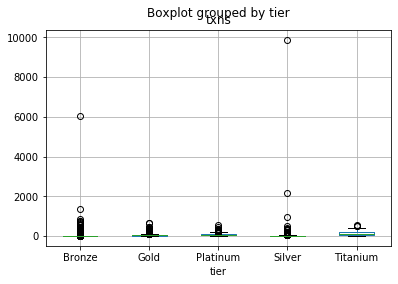

<Figure size 1080x720 with 0 Axes>

In [25]:
#plotting transactions tier wise
mmt_data.boxplot(column = 'txns', by = 'tier')
plt.figure(figsize=(15,10))


- There are outliers in the txns column

In [27]:
mmt_data_txns = mmt_data[mmt_data['txns'] < 3000 ]

<Figure size 1080x720 with 0 Axes>

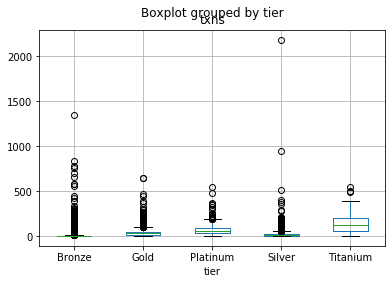

<Figure size 1080x720 with 0 Axes>

In [28]:
#Plotting boxplot for transcactions less then 3000
mmt_data_txns.boxplot(column = 'txns', by = 'tier')
plt.figure(figsize=(15,10))

In [29]:
mmt_data_txns1 = mmt_data[mmt_data['txns'] < 1000 ]

<Figure size 1080x720 with 0 Axes>

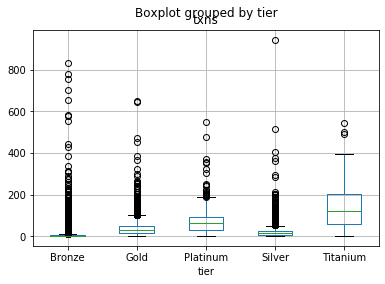

<Figure size 1080x720 with 0 Axes>

In [30]:
#Plotting boxplot for transcactions less then 1000
mmt_data_txns1.boxplot(column = 'txns', by = 'tier')
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

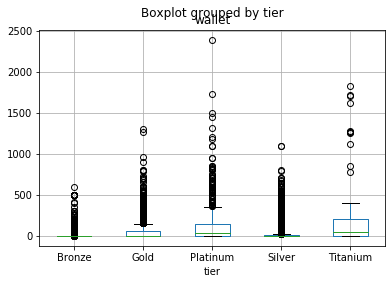

<Figure size 1080x720 with 0 Axes>

In [32]:
#plotting wallet tier wise
mmt_data.boxplot(column = 'wallet', by = 'tier')
plt.figure(figsize=(15,10))


- Least wallet amount is with bronze and silver tier user.

<a id=section4></a>

## Problem Statement 2

## Who are our top 1 percentile of user. Why are they in this bucket.

In [33]:
mmt_data.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN


Top 1 percentile users are the ones who have made maximun transactions.

In [45]:
mmt_top1_perc = mmt_data.sort_values(by = 'txns', ascending=False)

In [46]:
mmt_top1_perc.head() 

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task
93863,b32d10c98fafc5d46f7f4ddea5555350db9964f2,2013-08-22,0.0,Silver,9882,yes,Vodafone,Tamil Nadu,Y,android_mid,NaN
91363,21cf43d6ff2071a259f7723c460a244dd1828a7f,2013-07-12,0.0,Bronze,6044,No,Idea,Punjab,N,NaN,NaN
95380,0ed69a1df72a2a27ab147d431b5146cb5c4c3ec6,2013-07-08,0.0,Silver,2185,No,BSNL,Kerala,Y,ios_high,NaN
90404,accd404f4968ff313c95956bc48a8d0ebc0e2ac0,2013-07-17,0.0,Bronze,1344,No,NaN,NaN,N,NaN,NaN
52851,5654924a72d94a5c47b2e95dc531bb9b40decbf0,2013-02-27,0.0,Silver,944,yes,Vodafone,Delhi,Y,android_mid,15.0


Top 1 percentile will be the top 1% of the users, i.e., top 1000 users.

In [47]:
mmt_top1_perc = mmt_top1_perc.head(1000)

In [49]:
mmt_top1_perc.shape

(1000, 11)

Visualising top 1 percentile

In [51]:
year1 = mmt_top1_perc.signup_date.dt.year
mmt_top1_perc['year'] = year1
mmt_top1_perc.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task,year
93863,b32d10c98fafc5d46f7f4ddea5555350db9964f2,2013-08-22,0.0,Silver,9882,yes,Vodafone,Tamil Nadu,Y,android_mid,NaN,2013
91363,21cf43d6ff2071a259f7723c460a244dd1828a7f,2013-07-12,0.0,Bronze,6044,No,Idea,Punjab,N,NaN,NaN,2013
95380,0ed69a1df72a2a27ab147d431b5146cb5c4c3ec6,2013-07-08,0.0,Silver,2185,No,BSNL,Kerala,Y,ios_high,NaN,2013
90404,accd404f4968ff313c95956bc48a8d0ebc0e2ac0,2013-07-17,0.0,Bronze,1344,No,NaN,NaN,N,NaN,NaN,2013
52851,5654924a72d94a5c47b2e95dc531bb9b40decbf0,2013-02-27,0.0,Silver,944,yes,Vodafone,Delhi,Y,android_mid,15.0,2013


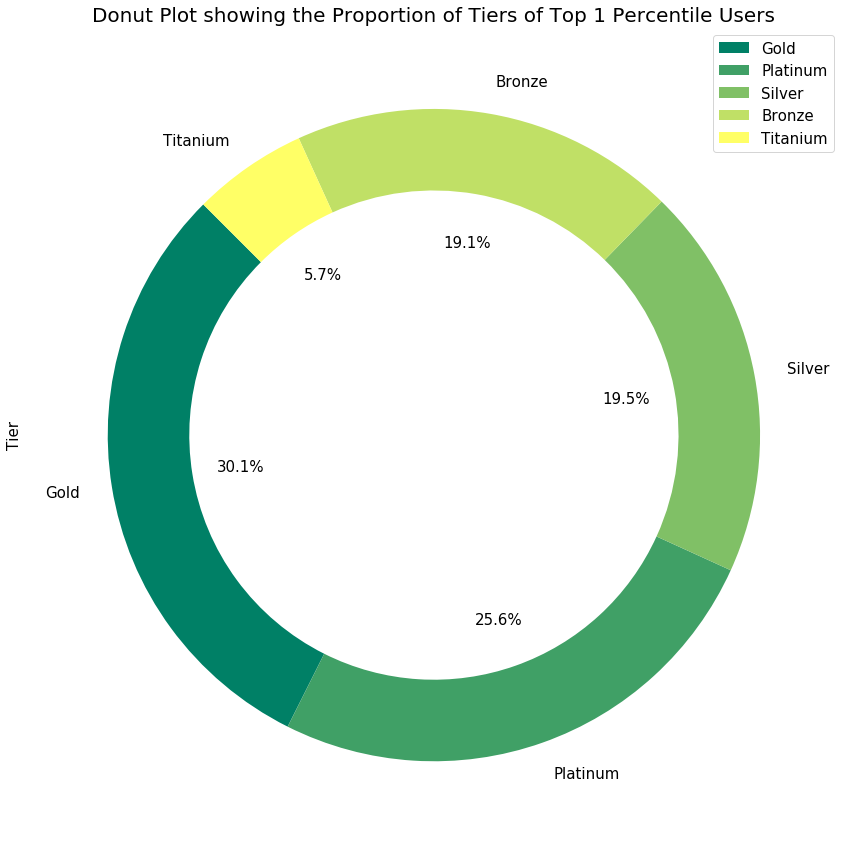

In [54]:
#plotting distribution of Tiers in top 1 Percentile of users
plt.figure(figsize=(15,15))
mmt_top1_perc['tier'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=15, autopct='%3.1f%%', figsize=(15,15), 
                                       startangle=135,  cmap='summer')
plt.ylabel('Tier', fontsize = 15)
plt.title('Donut Plot showing the Proportion of Tiers of Top 1 Percentile Users', fontsize = 20)
plt.legend(fontsize =15)
plt.savefig('Donut Plot showing the Proportion of Tiers of Top 1 Percentile Users.png')

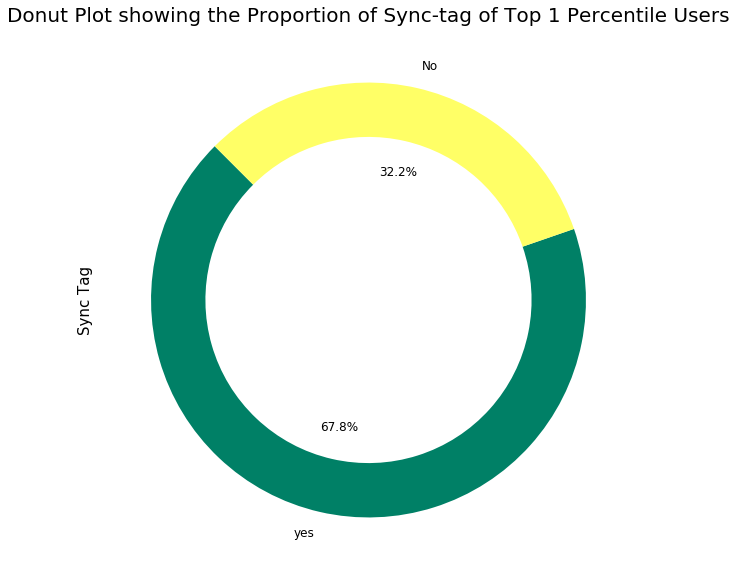

In [55]:
#plotting distribution of sync_tag in top 1 Percentile of users
plt.figure(figsize=(15,15))
mmt_top1_perc['sync_tag'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=12, autopct='%3.1f%%', figsize=(10,10), 
                                       startangle=135,  cmap='summer')

plt.ylabel('Sync Tag', fontsize = 15)
plt.title('Donut Plot showing the Proportion of Sync-tag of Top 1 Percentile Users', fontsize = 20)
plt.savefig('Donut Plot showing the Proportion of Sync-tag of Top 1 Percentile Users.png')

Contrary to total users, top 1 percentile of users have more of those who sync their data.

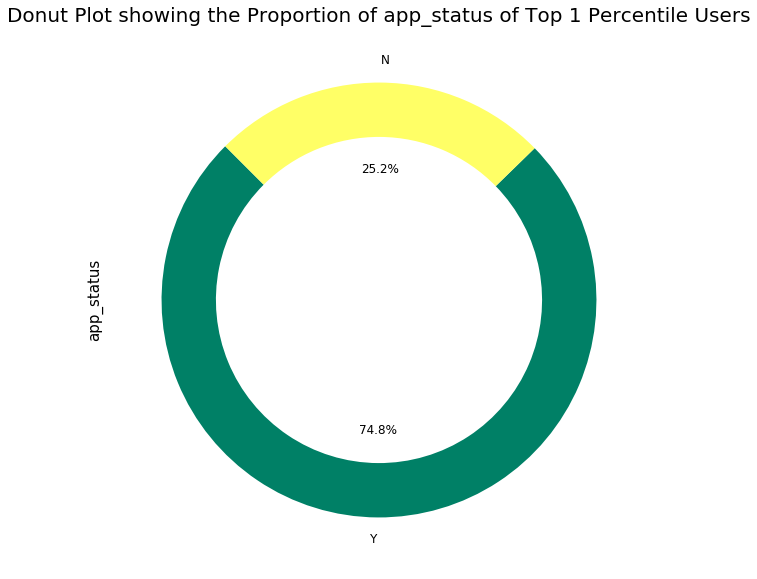

In [56]:
#plotting distribution of app status in top 1 Percentile of users
plt.figure(figsize=(15,15))
mmt_top1_perc['app_status'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.25),
                                      fontsize=12, autopct='%3.1f%%', figsize=(10,10), 
                                       startangle=135,  cmap='summer')

plt.ylabel('app_status', fontsize = 15)
plt.title('Donut Plot showing the Proportion of app_status of Top 1 Percentile Users', fontsize = 20)
plt.savefig('Count of app_status of Top 1 Percentile Users.png', bbox_inches='tight')


Contrary to total users, top 1 percentile of users have more of those who have apps.

<a id=section5></a>

## Problem Statement 3

## What is the probability of users transacting again, who have made single transaction till date?

For this, lets build a logistic regression model.

#### Dropping Columns

In [71]:
mmt_data_log1 = mmt_data.copy()
mmt_data_log1.head()

,userid,signup_date,wallet,tier,txns,sync_tag,operator_name,state,app_status,segment,task
0,7cb3f42379df52fb7c22a44c27399c3177bd99d2,2010-10-26,0.0,Silver,56,yes,Aircel,Assam,Y,ios_mid,NaN
1,f233e57f7a6fcd4dde48ab163bcb8f1d4e960300,2010-11-01,0.0,Bronze,5,yes,Vodafone,Andhra Pradesh,N,NaN,NaN
2,269f4f812dd5574240101fe2585d2e5b9ac8ba2c,2010-12-21,0.0,Bronze,1,yes,Airtel,Andhra Pradesh,Y,android_mid,2.0
3,bc9df7db16d7e5bdda4cc0b9d650014304c67dda,2011-05-02,0.0,Bronze,3,No,NaN,NaN,N,NaN,NaN
4,6bc67af161cdfbb59a3e5ecec50646017ae7d9eb,2011-07-08,0.0,Bronze,2,No,NaN,NaN,N,NaN,NaN


In [72]:
#dropping 'userid', 'signup_date', operator name', 'state', 'segment' and 'task'
mmt_data_log1.drop(['userid', 'signup_date', 'operator_name', 'state', 'task', 'segment'], axis =1, inplace = True)

In [73]:
mmt_data_log1.head()

,wallet,tier,txns,sync_tag,app_status
0,0.0,Silver,56,yes,Y
1,0.0,Bronze,5,yes,N
2,0.0,Bronze,1,yes,Y
3,0.0,Bronze,3,No,N
4,0.0,Bronze,2,No,N


#### Encoding Categorical Columns

In [74]:
mmt_data_log1 = pd.get_dummies(mmt_data_log1, columns=['tier','sync_tag', 'app_status'], drop_first=True)

In [75]:
mmt_data_log1.head()

,wallet,txns,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,0.0,56,0,0,1,0,1,1
1,0.0,5,0,0,0,0,1,0
2,0.0,1,0,0,0,0,1,1
3,0.0,3,0,0,0,0,0,0
4,0.0,2,0,0,0,0,0,0


#### Checking correlation

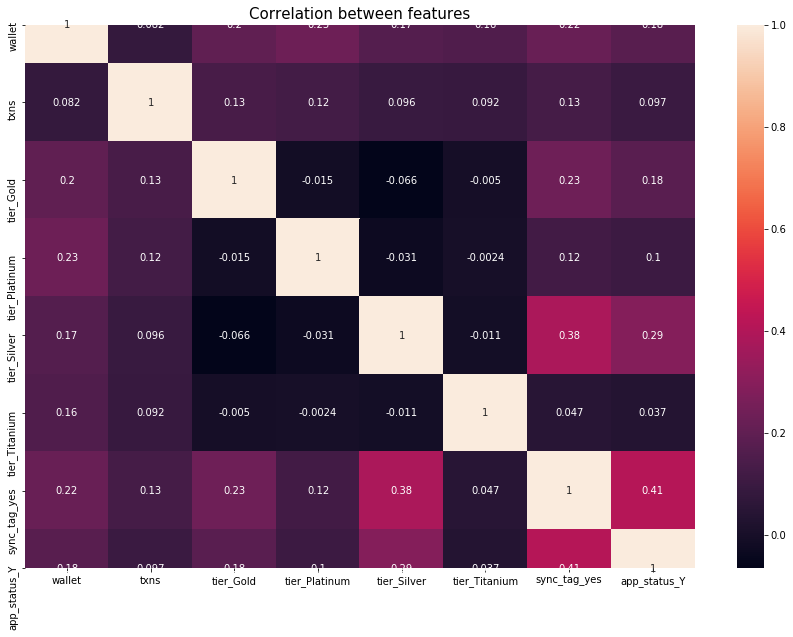

In [76]:
corr = mmt_data_log1.corr()   
plt.figure(figsize=(15,10))
sns.heatmap( mmt_data_log1.corr(), annot=True)
plt.title('Correlation between features', fontsize = 15)
plt.savefig('Correlation between features.png',  bbox_inches='tight')

In [78]:
mmt_data_log1[mmt_data_log1['txns'] > 1] = 0  #setting multiple transactions to 0 and single transactions remains 1

In [81]:
mmt_data_log1.head()

,wallet,txns,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,0.0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0
2,0.0,1,0,0,0,0,1,1
3,0.0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0


### Preparing X and y using pandas

In [82]:
X = mmt_data_log1.loc[:,mmt_data_log1.columns != 'txns']
X.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,0.0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0
2,0.0,0,0,0,0,1,1
3,0.0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0


In [83]:
y = mmt_data_log1.txns 
y.head()

0    0
1    0
2    1
3    0
4    0
Name: txns, dtype: int64

0 = More than 1 transaction\
1 = Only 1 transaction

### Train-Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [85]:
print(X_train.shape)
print(y_train.shape)

(80000, 7)
(80000,)


### Scaling the Data

In [86]:
#fit and transform on train data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train) 
X_train_s = pd.DataFrame(X_train_s, columns = X.columns)
X_train_s.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
1,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
2,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
3,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
4,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846


In [87]:
#transform on test data
X_test_s = sc.transform(X_test)
X_test_s = pd.DataFrame(X_test_s, columns = X.columns)
X_test_s.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
1,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
2,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
3,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846
4,-0.045147,-0.03573,-0.016958,-0.07671,-0.006124,-0.163786,-0.289846


### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_s,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred_logreg = logreg.predict(X_test_s)

In [90]:
y_pred_prob_logreg = logreg.predict_proba(X_test_s)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc,roc_auc_score

In [92]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_logreg)) 
print("recall score: ", recall_score(y_test,y_pred_logreg))
print("precision score: ", precision_score(y_test,y_pred_logreg))
print("f1 score: ", f1_score(y_test,y_pred_logreg))
print("accuracy score: ", accuracy_score(y_test,y_pred_logreg))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob_logreg[:,1])))

test-set confusion matrix:
 [[13315     0]
 [ 4887  1798]]
recall score:  0.26896035901271503
precision score:  1.0
f1 score:  0.4239066368030178
accuracy score:  0.75565
ROC AUC: 0.6344801795063575


In [93]:
y_pred_prob_logreg

array([[7.31537407e-01, 2.68462593e-01],
       [7.31537407e-01, 2.68462593e-01],
       [7.31537407e-01, 2.68462593e-01],
       ...,
       [1.47604962e-04, 9.99852395e-01],
       [1.47604962e-04, 9.99852395e-01],
       [7.31537407e-01, 2.68462593e-01]])

In [95]:
y_pred_prob_logreg_df = pd.DataFrame(y_pred_prob_logreg)
y_pred_prob_logreg_df

,0,1
0,0.731537,0.268463
1,0.731537,0.268463
2,0.731537,0.268463
3,0.731537,0.268463
4,0.731537,0.268463
...,...,...
19995,0.731537,0.268463
19996,0.731537,0.268463
19997,0.000148,0.999852
19998,0.000148,0.999852


In [136]:
logreg.score(X_test_s, y_test)

0.75565

### Finding probability score of each user

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_s = sc.fit_transform(X) 
X_s = pd.DataFrame(X_s, columns = X.columns)
X_s.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y
0,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603
1,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603
2,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,6.136352,3.453004
3,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603
4,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603


In [98]:
X_s.shape

(100000, 7)

In [99]:
y_pred_prob_logreg_X = logreg.predict_proba(X_s)

In [101]:
y_pred_prob_logreg_X = pd.DataFrame(y_pred_prob_logreg_X)
y_pred_prob_logreg_X.head()

,0,1
0,7.304249e-01,0.269575
1,7.304249e-01,0.269575
2,1.501690e-08,1.000000
3,7.304249e-01,0.269575
4,7.304249e-01,0.269575


In [105]:
#oncatinationg the two dataframes
prob_model = pd.concat([X_s, y_pred_prob_logreg_X], axis = 1)
prob_model.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y,0,1
0,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
1,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
2,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,6.136352,3.453004,1.501690e-08,1.000000
3,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
4,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575


The column '0' shows the probablity of multiple transactions.

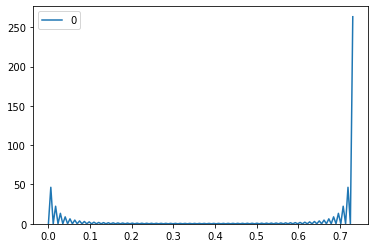

In [107]:
sns.kdeplot(prob_model[0])

In [109]:
mult_trans_prob =  prob_model[0]
mult_trans_prob.head()

0    7.304249e-01
1    7.304249e-01
2    1.501690e-08
3    7.304249e-01
4    7.304249e-01
Name: 0, dtype: float64

In [119]:
#Filtering those with probabilty more than 0.5 
mult_trans_prob2 = mult_trans_prob[mult_trans_prob > 0.5]

In [120]:
mult_trans_prob2

0        0.730425
1        0.730425
3        0.730425
4        0.730425
5        0.730425
           ...   
99991    0.730425
99992    0.730425
99994    0.730425
99995    0.730425
99996    0.730425
Name: 0, Length: 90908, dtype: float64

In [121]:
#finding average probability
mult_trans_prob1.mean()

0.7304248656074431

So, probability of users transacting again, who have made single transaction till date is **0.73**.

<a id=section6></a>

## Problem 4

## Build a statistical Model to find the probability of repeat transaction by a user and divide them in 10 different buckets of probability with equal user in each bucket.

In [122]:
prob_model.head()

,wallet,tier_Gold,tier_Platinum,tier_Silver,tier_Titanium,sync_tag_yes,app_status_Y,0,1
0,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
1,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
2,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,6.136352,3.453004,1.501690e-08,1.000000
3,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575
4,-0.043201,-0.035235,-0.017032,-0.077236,-0.006325,-0.162963,-0.289603,7.304249e-01,0.269575


In [137]:
prob_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
wallet           100000 non-null float64
tier_Gold        100000 non-null float64
tier_Platinum    100000 non-null float64
tier_Silver      100000 non-null float64
tier_Titanium    100000 non-null float64
sync_tag_yes     100000 non-null float64
app_status_Y     100000 non-null float64
0                100000 non-null float64
1                100000 non-null float64
dtypes: float64(9)
memory usage: 6.9 MB


#### For '0' column

In [125]:
bins = np.linspace(prob_model[0].min(), prob_model[0].max(), 10)
bins

array([0.        , 0.08115832, 0.16231664, 0.24347496, 0.32463327,
       0.40579159, 0.48694991, 0.56810823, 0.64926655, 0.73042487])

In [133]:
bins_ = prob_model[0].groupby(pd.cut(prob_model[0],bins))

In [136]:
bins_.mean()

0
(0.0, 0.0812]      0.000184
(0.0812, 0.162]         NaN
(0.162, 0.243]          NaN
(0.243, 0.325]     0.304058
(0.325, 0.406]          NaN
(0.406, 0.487]          NaN
(0.487, 0.568]          NaN
(0.568, 0.649]          NaN
(0.649, 0.73]      0.730425
Name: 0, dtype: float64

#### For '1' Column

In [138]:
bins1 = np.linspace(prob_model[1].min(), prob_model[1].max(), 10)
bins1

array([0.26957513, 0.35073345, 0.43189177, 0.51305009, 0.59420841,
       0.67536673, 0.75652504, 0.83768336, 0.91884168, 1.        ])

In [139]:
bins_1 = prob_model[1].groupby(pd.cut(prob_model[1],bins))

In [140]:
bins_1.mean()

1
(0.0, 0.0812]           NaN
(0.0812, 0.162]         NaN
(0.162, 0.243]          NaN
(0.243, 0.325]     0.269575
(0.325, 0.406]          NaN
(0.406, 0.487]          NaN
(0.487, 0.568]          NaN
(0.568, 0.649]          NaN
(0.649, 0.73]      0.695942
Name: 1, dtype: float64

<img src="https://media.giphy.com/media/3o6ozuHcxTtVWJJn32/giphy.gif" width="240" height="360" />